Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings(action='ignore')

Loading Dataset

In [2]:
wine_quality = pd.read_csv(r"/content/MajorProject.csv")
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [3]:
print(wine_quality.shape)

(1599, 12)


Description

In [4]:
wine_quality.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


Finding Null Values

In [5]:
print(wine_quality.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64


In [6]:
wine_quality[wine_quality['total sulfur dioxide'].isna() | wine_quality['pH'].isna() | wine_quality['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.50,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0
123,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.9976,3.44,0.53,9.5,NaN
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.9970,NaN,0.58,9.3,6.0


In [7]:
wine_quality.dropna(inplace=True)

wine_quality.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis and Visulaization

In [8]:
# Statistical measures of the dataset
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.321366,0.527666,0.271128,2.536936,0.087487,15.882206,46.431078,0.996745,3.498716,0.658189,10.424217,5.636591
std,1.742121,0.179154,0.194847,1.408341,0.047107,10.467380,32.893072,0.001889,0.080297,0.169587,1.066046,0.807963
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997842,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [9]:
wine_quality.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3.0,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.520000,0.570000,9.955000
4.0,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.485660,0.596415,10.265094
5.0,8.168483,0.576959,0.243873,2.523490,0.092786,16.992636,56.480118,0.997102,3.485346,0.620839,9.899411
6.0,8.349765,0.497292,0.273925,2.478100,0.084965,15.723705,40.836735,0.996614,3.508100,0.675479,10.631606
7.0,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.514774,0.741256,11.465913
8.0,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.520000,0.767778,12.094444


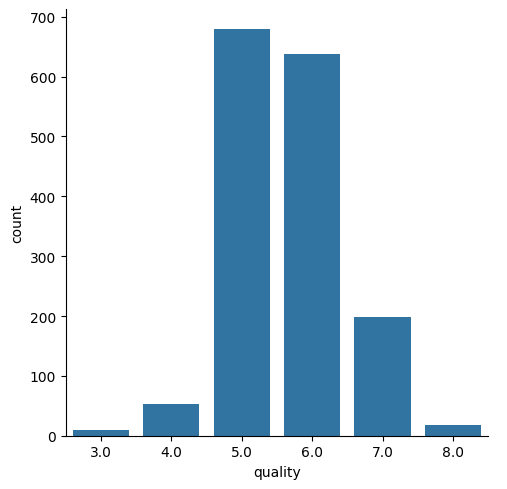

In [10]:
# number of values for each quality
sns.catplot(x='quality', data = wine_quality, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

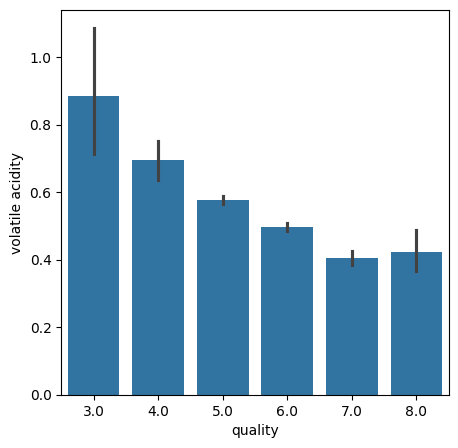

In [11]:
# volatile acidity vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y ='volatile acidity', data = wine_quality)

<Axes: xlabel='quality', ylabel='citric acid'>

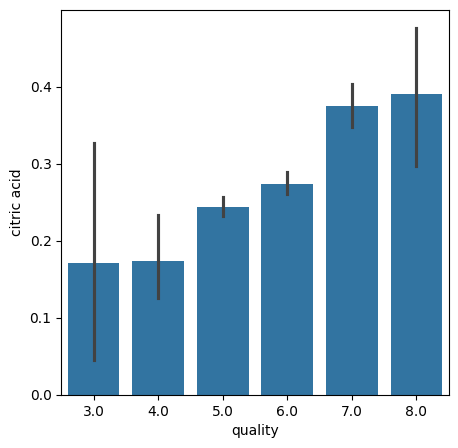

In [12]:
# citric acid vs quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_quality)

Correlation

1.Positive Correlation

2.Negative Correlation

In [13]:
correlation = wine_quality.corr()

<Axes: >

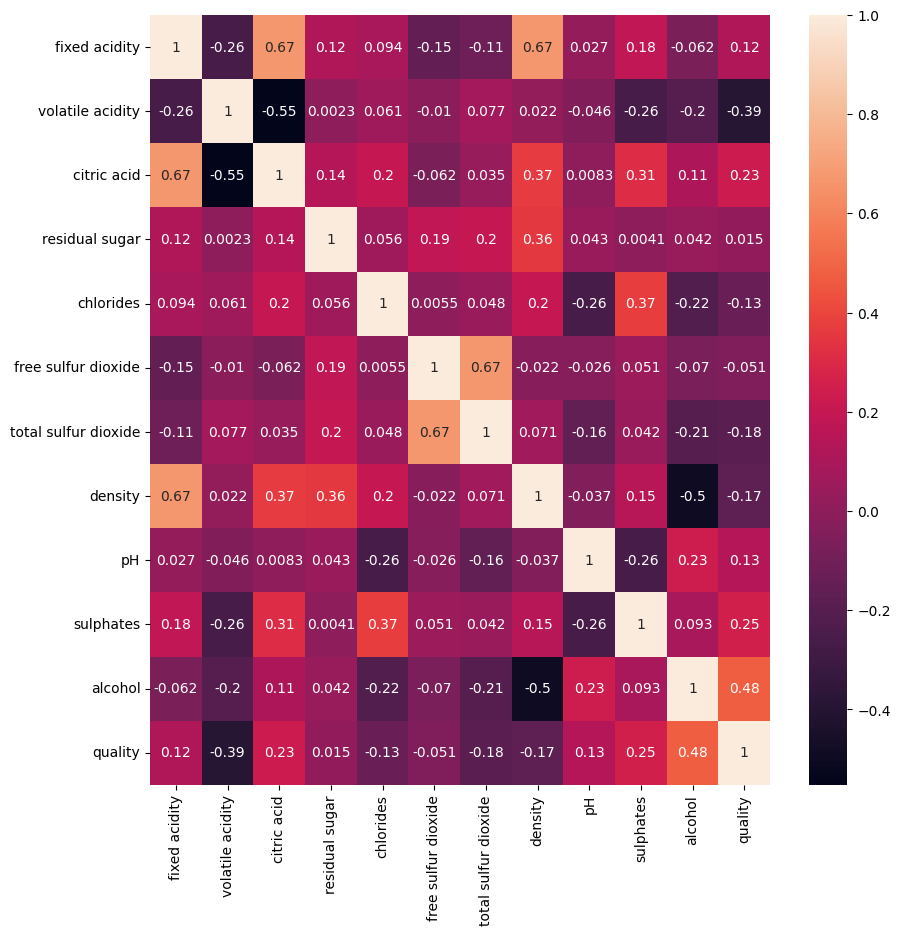

In [14]:
#constructing a heatmap to understand the correlation between the columns

plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot= True)

Data Preprocessing

In [15]:
# seperate the data and label
Y = wine_quality.drop('quality', axis=1)
print(Y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Label Binarization

In [16]:
Z = wine_quality['quality'].apply(lambda z_value: 1 if z_value >= 7 else 0)

Train & Test Split

In [17]:
Y_train, Y_test, Z_train, Z_test = train_test_split(Y, Z, test_size=0.2, random_state=3)

Model Training:

KNN Model

In [18]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(Y_train, Z_train)

KNeighborsClassifier()

Model Evaluation

Accuracy Score

In [19]:
# accuracy on test data

Y_test_prediction = model.predict(Y_test)
test_data_accuracy = accuracy_score(Y_test_prediction, Z_test)
print('Accuracy:', test_data_accuracy)

Accuracy: 0.85


Building Predictive System

In [20]:
input_data = (7.5, 0.5, 0.36, 6.1, 0.071, 17.0, 102.0, 0.9978, 3.35, 0.8, 10.5)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 1:
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[0]
Bad Quality Wine
